# Analisa Paket Prabayar

Anda bekerja sebagai analis untuk operator telekomunikasi Megaline. Perusahaan tersebut menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda akan memiliki 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan.

**Deskripsi Paket Prabayar**

Catatan: Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

**Surf**

1. Biaya bulanan: \$20
2. 500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
3. Setelah melebihi batas paket, akan dikenakan:
    - 1 menit: 3 sen
    - 1 SMS: 3 sen
    - 1 GB data: \$10

**Ultimate**

1. Biaya bulanan: \$70
2. 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
3. Setelah melebihi batas paket, akan dikenakan:
    - 1 menit: 1 sen
    - 1 SMS: 1 sen
    - 1 GB data: \$7

<b>Pertanyaan:</b>

   1. Paket prabayar mana yang mendatangkan lebih banyak pendapatan?

<b>Hipotesis:</b>

   1. Rata-rata pendapatan dari pengguna paket telepon 'Surf' dan 'Ultimate' berbeda.
   2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
    - [Memeriksa setiap dataset](#check)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
    - [Dataset calls](#calls)
    - [Dataset internet](#internet)
    - [Dataset messages](#messages)
    - [Dataset plans](#plans)
    - [Dataset users](#users)
    - [Mempersiapkan data](#prepare)
3. [*Exploratory Data Analysis*](#EDA)
    - [Pengguna paket 'Surf' dan 'Ultimate'](#paket)
4. [Menguji Hipotesis](#Test)
    - [Rata-rata pendapatan dari pengguna paket telepon 'Surf' dan 'Ultimate'](#h1)
    - [Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain](#h2)
4. [Kesimpulan Umum](#Kesimpulan)

## Ikhtisar Data <a id="Mulai"></a>

In [1]:
# Memuat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Memuat dataset
calls = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_calls.csv')
internet = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_internet.csv')
messages = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_messages.csv')
plans = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_plans.csv')
users = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\4 Project\\megaline_users.csv')

### Memeriksa setiap dataset <a id="check"></a>

#### calls

In [3]:
# Informasi umum dataset megaline_calls.csv
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
# Ukuran dataset
calls.shape

(137735, 4)

dataset ini berisi data panggilan yang dilakukan oleh pengguna.

In [5]:
# Menampilkan sampel data megaline_calls.csv
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Dokumentasi tabel `calls` (data panggilan):

- `id` — ID sesi web unik
- `call_date` — tanggal panggilan
- `duration` — durasi panggilan (dalam menit)
- `user_id` — ID pengguna yang melakukan panggilan

In [6]:
# Memeriksa duplikat dataset megaline_calls.csv
calls.duplicated().sum()

0

Dalam dataset ini, tidak terdapat data yang terduplikat, begitu juga *missing value*, tipe data yang dimiliki kolom `call_date` bisa dirubah menjadi tipe data period, dan untuk kolom `duration` akan dibulatkan keatas sesuai ketentuan dari Megaline.

[Kembali ke tahapan](#back)

#### internet

In [7]:
# Informasi umum dataset megaline_internet.csv
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
# Ukuran dataset
internet.shape

(104825, 4)

dataset ini berisi data sesi web yang dilakukan oleh pengguna.

In [9]:
# Menampilkan sampel data megaline_internet.csv
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Dokumentasi tabel `internet` (data sesi web):

- `id` — ID sesi web unik
- `mb_used` — volume data yang dihabiskan selama sesi (dalam megabita)
- `session_date` — tanggal sesi web
- `user_id` — ID pengguna

In [10]:
# Memeriksa duplikat dataset megaline_internet.csv
internet.duplicated().sum()

0

Dalam dataset ini, tidak terdapat *missing value* maupun data yang terduplikasi, tipe data yang dimiliki kolom `session_date` bisa dirubah menjadi tipe data period. Pada kolom `mb_used` karena satuannya *megabyte* jadi bisa dikonversi ke satuan *gigabyte* dan nilainya bisa dibulatkan.

[Kembali ke tahapan](#back)

#### messages

In [11]:
# Informasi umum dataset megaline_messages.csv
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
# Ukuran dataset
messages.shape

(76051, 3)

dataset ini berisi data sms yang dilakukan oleh pengguna.

In [13]:
# Menampilkan sampel data megaline_messages.csv
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Dokumentasi tabel `messages` (data SMS):

- `id` — ID SMS unik
- `message_date` — tanggal SMS dikirim
- `user_id` — ID pengguna yang mengirim SMS

In [14]:
# Memeriksa duplikat dataset megaline_message.csv
messages.duplicated().sum()

0

Dalam dataset ini, tidak terdapat *missing value* maupun data yang terduplikat, tipe data yang dimiliki kolom `message_date` bisa dirubah menjadi tipe data period.

[Kembali ke tahapan](#back)

#### plans

In [15]:
# Informasi umum dataset megaline_plans.csv
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [16]:
# Ukuran dataset
plans.shape

(2, 8)

dataset ini berisi data paket telepon yang dilakukan oleh pengguna.

In [17]:
# Menampilkan sampel data megaline_plans.csv
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dokumentasi tabel `plans` (data paket telepon):

- `plan_name` — nama paket telepon
- `usd_monthly_fee` — biaya bulanan dalam dolar AS
- `minutes_included` — alokasi menit panggilan bulanan
- `messages_included` — alokasi SMS bulanan
- `mb_per_month_included` — alokasi volume data bulanan (dalam megabita)
- `usd_per_minute` — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` — harga per SMS jika telah melebihi batas alokasi paket
- `usd_per_gb` — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [18]:
# Memeriksa duplikat dataset megaline_plans.csv
plans.duplicated().sum()

0

kolom `mb_per_month_included` bisa dikonversi menjadi gigabyte.

[Kembali ke tahapan](#back)

#### users

In [19]:
# Informasi umum dataset megaline_users.csv
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
# Ukuran dataset
users.shape

(500, 8)

dataset ini berisi data pengguna dari operator telekomunikasi Megaline.

In [21]:
# Menampilkan sampel data megaline_users.csv
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Dokumentasi tabel `users` (data pengguna):

- `user_id` — ID pengguna
- `first_name` — nama depan pengguna
- `last_name` — nama belakang pengguna
- `age` — usia pengguna (tahun)
- `reg_date` — tanggal mulai berlangganan (dd, mm, yy)
- `churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- `city` — kota tempat tinggal pengguna
- `plan` — nama paket telepon

In [22]:
# Memeriksa duplikat dataset megaline_users.csv
users.duplicated().sum()

0

Dalam dataset ini, tidak terdapat data yang terduplikat namun terdapat *missing value* di kolom `chrun_date`. data dalam kolom `city` perlu dirubah untuk memudahkan analisa. tipe data yang dimiliki kolom `reg_date` dan `churn_date` bisa dirubah menjadi tipe data period.

**Kesimpulan sementara**

1. dataset calls
    1. tipe data pada kolom `call_date` bisa dirubah ke period untuk mengambil data tahun dan bulan,
    2. nilai kolom `duration` akan dibulatkan ke atas.
2. dataset internet
    1. tipe data pada kolom `session_date` bisa dirubah ke period untuk mengambil data tahun dan bulan,
    2. konversi nilai pada kolom `mb_used` menjadi gigabyte.
3. dataset messages
    1. tipe data pada kolom `message_date` bisa dirubah ke period untuk mengambil data tahun dan bulan.
4. dataset plans
    1. konversi nilai pada kolom `mb_per_month_included` menjadi gigabyte.
5. dataset users
    1. terdapat *missing value* pada kolom `churn_date`, namun *missing value* ini berarti paket layanan sedang digunakan jadi mari biarkan *missing value* tersebut,
    2. kolom `city` perlu dirubah,
    3. tipe data pada kolom `reg_date` dan `churn_date` bisa dirubah ke period untuk mengambil data tahun dan bulan.

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data <a id="Pra-pemrosesan"></a>

Karena ada beberapa kolom yang akan dirubah ke datetime dari dataset yang berbeda jadi bisa menggunakan fungsi untuk mempermudah penggantian.

In [23]:
# Fungsi untuk merubah tipe data dan melakukan beberapa perubahan
'''
Definisi:
-----------
    Fungsi untuk merubah tipe data ke datetime, memisah tahun dan bulan untuk dimasukkan ke kolom baru
-----------
    data:
        data yang diinginkan
    which_column:
        kolom yang ingin dirubah
'''
def to_month (data, which_column):
    
    # Merubah tipe data menjadi datetime
    temp_array = pd.to_datetime(data[which_column])
    
    # Mendapatkan tahun dan bulan
    temp_array = temp_array.dt.to_period('M')
    
    return temp_array

### Dataset calls <a id="calls"></a>

In [24]:
# Menggunakan fungsi
calls['month'] = to_month (data=calls, which_column='call_date')

In [25]:
# Membulatkan nilai dari kolom `duration` dan merubah tipe datanya menjadi integer
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [26]:
# Memeriksa hasilnya
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype    
---  ------     --------------   -----    
 0   id         137735 non-null  object   
 1   user_id    137735 non-null  int64    
 2   call_date  137735 non-null  object   
 3   duration   137735 non-null  int32    
 4   month      137735 non-null  period[M]
dtypes: int32(1), int64(1), object(2), period[M](1)
memory usage: 4.7+ MB


In [27]:
# Memeriksa sampel data
calls.tail()

,id,user_id,call_date,duration,month
137730,1499_199,1499,2018-11-21,9,2018-11
137731,1499_200,1499,2018-10-20,11,2018-10
137732,1499_201,1499,2018-09-21,9,2018-09
137733,1499_202,1499,2018-10-10,1,2018-10
137734,1499_203,1499,2018-12-29,14,2018-12


Dataset calls sudah berhasil diperbaiki.

Dengan adanya kolom `month` jumlah panggilan yang dilakukan dan menit yang digunakan per bulan oleh setiap pengguna bisa diketahui dengan membuat pivot tabel.

In [28]:
# Membuat pivot table
call_stat = pd.pivot_table(calls, index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count'])

# Merubah nama kolom
call_stat.columns = ['total_min', 'total_calls']

# Reset index
call_stat = call_stat.reset_index()

In [29]:
# Memeriksa sampel data
call_stat.head()

,user_id,month,total_min,total_calls
0,1000,2018-12,124,16
1,1001,2018-08,182,27
2,1001,2018-09,315,49
3,1001,2018-10,393,65
4,1001,2018-11,426,64


`total_min` menunjukkan jumlah durasi panggilan per menit yang dilakukan pengguna per bulan, sedangkan kolom `total_calls` menunjukkan jumlah panggilan yang dilakukan pengguna per bulan.

[Kembali ke tahapan](#back)

### Dataset internet <a id="internet"></a>

In [30]:
# Menggunakan fungsi
internet['month'] = to_month (data=internet, which_column='session_date')

In [31]:
# Memeriksa hasilnya
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype    
---  ------        --------------   -----    
 0   id            104825 non-null  object   
 1   user_id       104825 non-null  int64    
 2   session_date  104825 non-null  object   
 3   mb_used       104825 non-null  float64  
 4   month         104825 non-null  period[M]
dtypes: float64(1), int64(1), object(2), period[M](1)
memory usage: 4.0+ MB


In [32]:
# Memeriksa sampel data
internet.tail()

,id,user_id,session_date,mb_used,month
104820,1499_215,1499,2018-10-20,218.06,2018-10
104821,1499_216,1499,2018-12-30,304.72,2018-12
104822,1499_217,1499,2018-09-22,292.75,2018-09
104823,1499_218,1499,2018-12-07,0.00,2018-12
104824,1499_219,1499,2018-12-24,758.31,2018-12


Dataset sudah berhasil diperbaiki.

Dengan adanya kolom `month` volume data per bulan yang digunakan oleh setiap pengguna bisa diketahui dengan membuat pivot tabel.

In [33]:
# Membuat pivot table
internet_stat = pd.pivot_table(internet, index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

In [34]:
# konversi kolom `mb_used` menjadi gigabyte, dan membulatkannya
internet_stat['gb_used'] = np.ceil(internet_stat['mb_used']/1024).astype('int')

In [35]:
# Merubah nama kolom
internet_stat.columns = ['total_mb', 'total_gb']

# Reset indeksnya
internet_stat = internet_stat.reset_index()

In [36]:
# Memeriksa hasilnya
internet_stat.head()

,user_id,month,total_mb,total_gb
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19


`total_mb` menunjukkan jumlah volume data dengan satuan *megabyte* yang dilakukan pengguna per bulan, sedangkan kolom `total_gb` menunjukkan jumlah volume data dengan satuan *gigabyte* yang dilakukan pengguna per bulan.

[Kembali ke tahapan](#back)

### Dataset messages <a id="messages"></a>

In [37]:
# Menggunakan fungsi
messages['month'] = to_month (data=messages, which_column='message_date')

In [38]:
# Memeriksa hasilnya
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   id            76051 non-null  object   
 1   user_id       76051 non-null  int64    
 2   message_date  76051 non-null  object   
 3   month         76051 non-null  period[M]
dtypes: int64(1), object(2), period[M](1)
memory usage: 2.3+ MB


In [39]:
# Memeriksa sampel data
messages.tail()

,id,user_id,message_date,month
76046,1497_526,1497,2018-12-24,2018-12
76047,1497_536,1497,2018-12-24,2018-12
76048,1497_547,1497,2018-12-31,2018-12
76049,1497_558,1497,2018-12-24,2018-12
76050,1497_613,1497,2018-12-23,2018-12


Dataset sudah berhasil diperbaiki.

Dengan adanya kolom `month` Jumlah SMS yang dikirim per bulan yang digunakan oleh setiap pengguna bisa diketahui dengan membuat pivot tabel.

In [40]:
# Membuat pivot table
messages_stat = pd.pivot_table(messages, index = ['user_id', 'month'], values = 'id', aggfunc = 'count')

# Merubah nama kolom
messages_stat.columns = ['total_messages']

# Reset indeksnya
messages_stat = messages_stat.reset_index()

In [41]:
# Memeriksa hasilnya
messages_stat.head()

,user_id,month,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


`total_messages` menunjukkan jumlah SMS per bulan yang dilakukan pengguna per bulan.

[Kembali ke tahapan](#back)

### Dataset plans <a id="plans"></a>

In [42]:
# konversi kolom `mb_per_month_included` menjadi gigabyte dan membulatkan nilainya
plans['gb_per_month_included'] = np.ceil(plans['mb_per_month_included']/1024).astype('int')

In [43]:
# Memeriksa hasilnya
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


Nilai kolom `mb_per_month_included` berhasil dikonversikan menjadi *gigabyte*.

[Kembali ke tahapan](#back)

### Dataset users <a id="users"></a>

In [44]:
# Mendapatkan data tahun dan bulan
# dari kolom `reg_date`
users['reg_date'] = to_month (data=users, which_column='reg_date')

# dari kolom `churn_date`
users['churn_date'] = to_month (data=users, which_column='churn_date')

In [45]:
# Memeriksa kolom `city`
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [46]:
# Merubah data pada kolom `city`
# Memisahkan string
users['clean_city'] = users['city'].str.split(', ').str[1]

# Mengganti `MSA`
users['clean_city'] = users['clean_city'].str.replace('MSA','')

In [47]:
# Memeriksa sampel data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01,surf,NaT,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05,surf,NaT,WA


In [48]:
# Memberi tanda `NY-NJ`
users['is_ny_nj'] = users['clean_city'].str.contains('NY-NJ', regex=True)

In [49]:
# Memeriksa sampel data
users.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is_ny_nj
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09,surf,NaT,NY-NJ-PA,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02,surf,NaT,LA,False
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12,ultimate,NaT,CA,False
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02,surf,NaT,NY-NJ-PA,True
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05,surf,NaT,FL,False


In [50]:
# Informasi umum dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   user_id     500 non-null    int64    
 1   first_name  500 non-null    object   
 2   last_name   500 non-null    object   
 3   age         500 non-null    int64    
 4   city        500 non-null    object   
 5   reg_date    500 non-null    period[M]
 6   plan        500 non-null    object   
 7   churn_date  34 non-null     period[M]
 8   clean_city  500 non-null    object   
 9   is_ny_nj    500 non-null    bool     
dtypes: bool(1), int64(2), object(5), period[M](2)
memory usage: 35.8+ KB


Dataset sudah berhasil diperbaiki.

[Kembali ke tahapan](#back)

### Mempersiapkan data <a id="prepare"></a>

In [51]:
# Memeriksa ukuran dataset
call_stat.shape, internet_stat.shape

((2258, 4), (2277, 4))

In [52]:
# Menggabungkan `call_stat` dengan `internet`
df = pd.merge(call_stat, internet_stat, on=['user_id', 'month'], how='outer')

# Memeriksa hasilnya
df

,user_id,month,total_min,total_calls,total_mb,total_gb
0,1000,2018-12,124.0,16.0,1901.47,2.0
1,1001,2018-08,182.0,27.0,6919.15,7.0
2,1001,2018-09,315.0,49.0,13314.82,14.0
3,1001,2018-10,393.0,65.0,22330.49,22.0
4,1001,2018-11,426.0,64.0,18504.30,19.0
...,...,...,...,...,...,...
2287,1311,2018-06,NaN,NaN,1498.83,2.0
2288,1349,2018-10,NaN,NaN,13093.55,13.0
2289,1349,2018-11,NaN,NaN,17128.26,17.0
2290,1349,2018-12,NaN,NaN,13039.91,13.0


In [53]:
# Memeriksa ukuran dataset
df.shape, messages_stat.shape

((2292, 6), (1806, 3))

In [54]:
# Menggabungkan `df` dengan `messages_stat`
df = pd.merge(df, messages_stat, on=['user_id', 'month'], how='outer')

# Memeriksa hasilnya
df

,user_id,month,total_min,total_calls,total_mb,total_gb,total_messages
0,1000,2018-12,124.0,16.0,1901.47,2.0,11.0
1,1001,2018-08,182.0,27.0,6919.15,7.0,30.0
2,1001,2018-09,315.0,49.0,13314.82,14.0,44.0
3,1001,2018-10,393.0,65.0,22330.49,22.0,53.0
4,1001,2018-11,426.0,64.0,18504.30,19.0,36.0
...,...,...,...,...,...,...,...
2288,1349,2018-10,NaN,NaN,13093.55,13.0,76.0
2289,1349,2018-11,NaN,NaN,17128.26,17.0,72.0
2290,1349,2018-12,NaN,NaN,13039.91,13.0,61.0
2291,1361,2018-05,NaN,NaN,1519.69,2.0,2.0


In [55]:
# Memeriksa ukuran dataset
df.shape, users.shape

((2293, 7), (500, 10))

In [56]:
# Menggabungkan `df` dengan `users`
df = pd.merge(df, users, on=['user_id'], how='outer')

# Memeriksa hasilnya
df

,user_id,month,total_min,total_calls,total_mb,total_gb,total_messages,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is_ny_nj
0,1000,2018-12,124.0,16.0,1901.47,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12,ultimate,NaT,GA,False
1,1001,2018-08,182.0,27.0,6919.15,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
2,1001,2018-09,315.0,49.0,13314.82,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
3,1001,2018-10,393.0,65.0,22330.49,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
4,1001,2018-11,426.0,64.0,18504.30,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08,surf,NaT,WA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaT,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12,surf,NaT,MA-NH,False
2299,1319,NaT,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06,surf,NaT,CO,False
2300,1378,NaT,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12,surf,NaT,CO,False
2301,1463,NaT,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11,ultimate,NaT,GA,False


In [57]:
# Memeriksa ukuran dataset
df.shape, plans.shape

((2303, 16), (2, 9))

In [58]:
# Menggabungkan `df` dengan `plans`
df = pd.merge(df, plans, left_on=['plan'], right_on=['plan_name'], how='outer')

# Memeriksa hasilnya
df

,user_id,month,total_min,total_calls,total_mb,total_gb,total_messages,first_name,last_name,age,...,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,16.0,1901.47,2.0,11.0,Anamaria,Bauer,45,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
1,1006,2018-11,10.0,2.0,2068.37,3.0,15.0,Jesusa,Bradford,73,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
2,1006,2018-12,59.0,9.0,32118.82,32.0,139.0,Jesusa,Bradford,73,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
3,1008,2018-10,476.0,71.0,17106.99,17.0,21.0,Emely,Hoffman,53,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
4,1008,2018-11,446.0,63.0,23676.72,24.0,37.0,Emely,Hoffman,53,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaT,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,...,False,50,15360,500,20,10,0.03,0.03,surf,15
2299,1307,NaT,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,...,False,50,15360,500,20,10,0.03,0.03,surf,15
2300,1319,NaT,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,...,False,50,15360,500,20,10,0.03,0.03,surf,15
2301,1378,NaT,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,...,False,50,15360,500,20,10,0.03,0.03,surf,15


In [59]:
# Kolom-kolom pada dataset
df.columns

Index(['user_id', 'month', 'total_min', 'total_calls', 'total_mb', 'total_gb',
       'total_messages', 'first_name', 'last_name', 'age', 'city', 'reg_date',
       'plan', 'churn_date', 'clean_city', 'is_ny_nj', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'gb_per_month_included'],
      dtype='object')

In [60]:
# Membersihkan kolom yang tidak perlu dan merubah letak kolom
df = df[[
    'user_id', 'clean_city', 'is_ny_nj', 'plan_name', 'month', 'total_min', 'total_calls',
    'total_gb', 'total_messages',
    'messages_included','gb_per_month_included', 'minutes_included', 'usd_monthly_pay',
    'usd_per_gb', 'usd_per_message', 'usd_per_minute'
]]

In [61]:
# Memeriksa hasilnya
df

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,1000,30,3000,70,7,0.01,0.01
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,1000,30,3000,70,7,0.01,0.01
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,1000,30,3000,70,7,0.01,0.01
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,1000,30,3000,70,7,0.01,0.01
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,1000,30,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,OH-KY-IN,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03
2299,1307,MA-NH,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03
2300,1319,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03
2301,1378,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03


**Kesimpulan sementara**

1. Pivot table yang telah dibuat:
    - jumlah panggilan yang dilakukan dan menit yang digunakan per bulan oleh setiap pengguna.
    - volume data per bulan yang digunakan oleh setiap pengguna
    - Jumlah SMS yang dikirim per bulan yang digunakan oleh setiap pengguna
2. Memperbaiki satuan pada kolom `mb_per_month_included`
3. Memperbaiki nilai kolom `city` dengan memisahkan string
4. Menggabungkan beberapa dataset dimulai dari `call_stat` dengan `internet`, hasilnya dengan `messages_stat`, dan terakhir dengan `users` yang menghasilkan dataset baru

[Kembali ke tahapan](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

Proses selanjutnya yakni menghitung pendapatan perbulan dari setiap pengguna Megaline.

In [62]:
# Fungsi untuk menghitung nilai pada dataset
'''
Definisi:
-----------
    Fungsi untuk menghitung biaya dari nilai yang dipakai oleh pengguna berdasarkan paket yang digunakan
    sesuai dengan ketentuan perusahaan.
-----------
    row:
        nilai baris yang ada pada dataset
'''
def profit_sum(row):
    mins_diff = 0
    gb_diff = 0
    mess_diff = 0
    
    # Pengguna dengan paket 'surf'
    if row['plan_name'] == 'surf':
        
        if row['total_min']>500:
            mins_diff = row['total_min'] - 500
        
        if row['total_gb']>15:
            gb_diff = row['total_gb'] - 15
            
        if row['total_messages']>50:
            mess_diff = row['total_messages'] - 50
        
        profit = (mins_diff * .03) + (mess_diff * .03) + (gb_diff * 10)
    
    # Pengguna dengan paket 'ultimate'
    if row['plan_name'] == 'ultimate':
        
        if row['total_min']>3000:
            mins_diff = row['total_min'] - 3000
        
        if row['total_gb']>30:
            gb_diff = row['total_gb'] - 30
        
        if row['total_messages']>1000:
            mess_diff = row['total_messages'] - 1000
        
        profit = (mins_diff * .01) + (mess_diff * .01) + (gb_diff * 7)
    
    return profit

In [63]:
# Mengaplikasikan fungsi dan membuat kolom baru
df['monthly_profit'] = df.apply(profit_sum, axis=1)

In [64]:
# Memeriksa hasilnya
df

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,1000,30,3000,70,7,0.01,0.01,0.0
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,1000,30,3000,70,7,0.01,0.01,0.0
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,1000,30,3000,70,7,0.01,0.01,14.0
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,1000,30,3000,70,7,0.01,0.01,0.0
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,1000,30,3000,70,7,0.01,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,OH-KY-IN,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0
2299,1307,MA-NH,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0
2300,1319,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0
2301,1378,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,0.0


In [65]:
# Mengganti nilai 0 dengan standar yang seharusnya dibayar pengguna 'surf'
df.loc[(df['plan_name']== 'surf'), 'monthly_profit'] += 20

In [66]:
# Mengganti nilai 0 dengan standar yang seharusnya dibayar pengguna 'ultimate'
df.loc[(df['plan_name']== 'ultimate'), 'monthly_profit'] += 70

In [67]:
# Memeriksa hasilnya
df

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_profit
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,1000,30,3000,70,7,0.01,0.01,70.0
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,1000,30,3000,70,7,0.01,0.01,70.0
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,1000,30,3000,70,7,0.01,0.01,84.0
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,1000,30,3000,70,7,0.01,0.01,70.0
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,1000,30,3000,70,7,0.01,0.01,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,OH-KY-IN,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0
2299,1307,MA-NH,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0
2300,1319,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0
2301,1378,CO,False,surf,NaT,NaN,NaN,NaN,NaN,50,15,500,20,10,0.03,0.03,20.0


Karena ada beberapa kolom yang tidak digunakan, jadi akan lebih baik jika difilter. Juga terdapat *missing value*, untuk kebutuhan analisa statistik maka akan diisi dengan nilai 0 (tipe kolom kuantitatif).

In [68]:
# Filter data yang akan digunakan
df_clean = df.loc[df['month'].notna()]

In [69]:
# Mengisi missing value
df_clean = df_clean.fillna(0)

In [70]:
# Membersihkan kolom yang tidak perlu
drop_cols = ['messages_included', 'gb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
df_clean.drop(drop_cols, axis=1, inplace=True)

In [71]:
# Memeriksa hasilnya
df_clean

,user_id,clean_city,is_ny_nj,plan_name,month,total_min,total_calls,total_gb,total_messages,monthly_profit
0,1000,GA,False,ultimate,2018-12,124.0,16.0,2.0,11.0,70.00
1,1006,CA,False,ultimate,2018-11,10.0,2.0,3.0,15.0,70.00
2,1006,CA,False,ultimate,2018-12,59.0,9.0,32.0,139.0,84.00
3,1008,FL,False,ultimate,2018-10,476.0,71.0,17.0,21.0,70.00
4,1008,FL,False,ultimate,2018-11,446.0,63.0,24.0,37.0,70.00
...,...,...,...,...,...,...,...,...,...,...
2292,1194,CA,False,surf,2018-11,0.0,0.0,42.0,62.0,290.36
2293,1194,CA,False,surf,2018-12,0.0,0.0,31.0,56.0,180.18
2294,1349,MA-NH,False,surf,2018-10,0.0,0.0,13.0,76.0,20.78
2295,1349,MA-NH,False,surf,2018-11,0.0,0.0,17.0,72.0,40.66


Dataset sudah siap untuk dianalisa.

[Kembali ke tahapan](#back)

### Pengguna paket 'Surf' dan 'Ultimate' <a id="paket"></a>

In [72]:
# Memfilter pengguna 'surf'
surf_user = df_clean.loc[df_clean['plan_name'] == 'surf']

In [73]:
# Memfilter pengguna 'ultimate'
ultimate_user = df_clean.loc[df_clean['plan_name'] == 'ultimate']

#### Analisa panggilan per bulan

In [74]:
# Varians kedua pengguna
print('varian pengguna surf:', np.var(surf_user['total_min']))
print('varian pengguna ultimate:', np.var(ultimate_user['total_min']))

varian pengguna surf: 54933.33459131747
varian pengguna ultimate: 57764.12527777776


In [75]:
# Rata-rata kedua pengguna
print('rata-rata pengguna surf:', surf_user['total_min'].mean())
print('rata-rata pengguna ultimate:', ultimate_user['total_min'].mean())

rata-rata pengguna surf: 428.7495232040687
rata-rata pengguna ultimate: 430.45


In [76]:
# Standard deviasi kedua pengguna
print('Standar deviasi pengguna surf:', surf_user['total_min'].std())
print('Standar deviasi pengguna ultimate:', ultimate_user['total_min'].std())

Standar deviasi pengguna surf: 234.45314982027938
Standar deviasi pengguna ultimate: 240.50876244378125


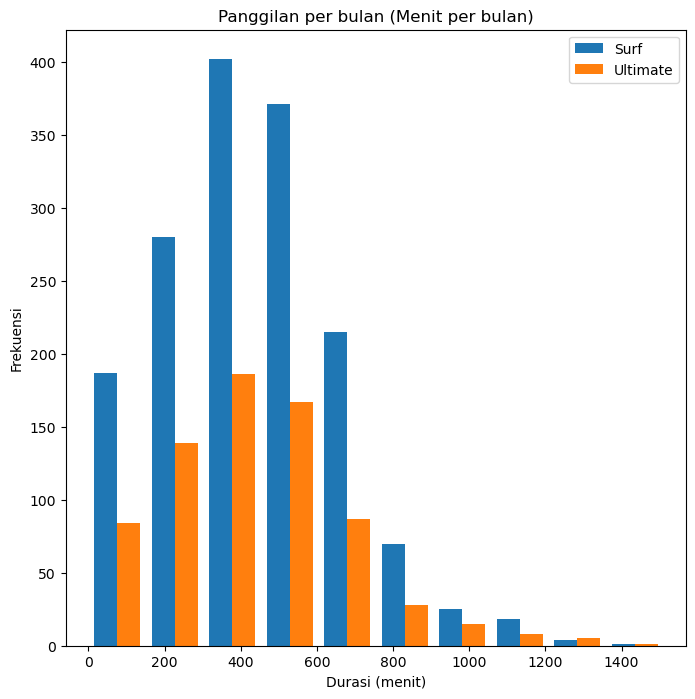

In [77]:
# Ukuran histogram
plt.figure(figsize=(8,8))

# Histogram
plt.hist(
         [surf_user['total_min'],ultimate_user['total_min']], 
         bins=10,
         label=['Surf','Ultimate']
)

# Judul histogram
plt.title("Panggilan per bulan (Menit per bulan)")

# Penamaan x,y-axis
plt.xlabel('Durasi (menit)')
plt.ylabel('Frekuensi')

# Legend pada histogram
plt.legend()

# Menampilkan histogram
plt.show()

Seperti yang terlihat banyak pengguna dengan paket surf melakukan panggilan selama 200 sampai 690 menit perbulan dengan rata-rata 429 menit. Sedangkan pengguna dengan paket ultimate melakukan panggilan selama 230 sampai 680 menit perbulan dengan rata 431 menit.

[Kembali ke tahapan](#back)

#### Analisa pesan per bulan

In [78]:
# Varians kedua pengguna
print('varian pengguna surf:', np.var(surf_user['total_messages']))
print('varian pengguna ultimate:', np.var(ultimate_user['total_messages']))

varian pengguna surf: 1126.0082317266636
varian pengguna ultimate: 1207.0779147376504


In [79]:
# Rata-rata kedua pengguna
print('rata-rata pengguna surf:', surf_user['total_messages'].mean())
print('rata-rata pengguna ultimate:', ultimate_user['total_messages'].mean())

rata-rata pengguna surf: 31.15956770502225
rata-rata pengguna ultimate: 37.55138888888889


In [80]:
# Standard deviasi kedua pengguna
print('Standar deviasi pengguna surf:', surf_user['total_messages'].std())
print('Standar deviasi pengguna ultimate:', ultimate_user['total_messages'].std())

Standar deviasi pengguna surf: 33.566717473569085
Standar deviasi pengguna ultimate: 34.767179114045675


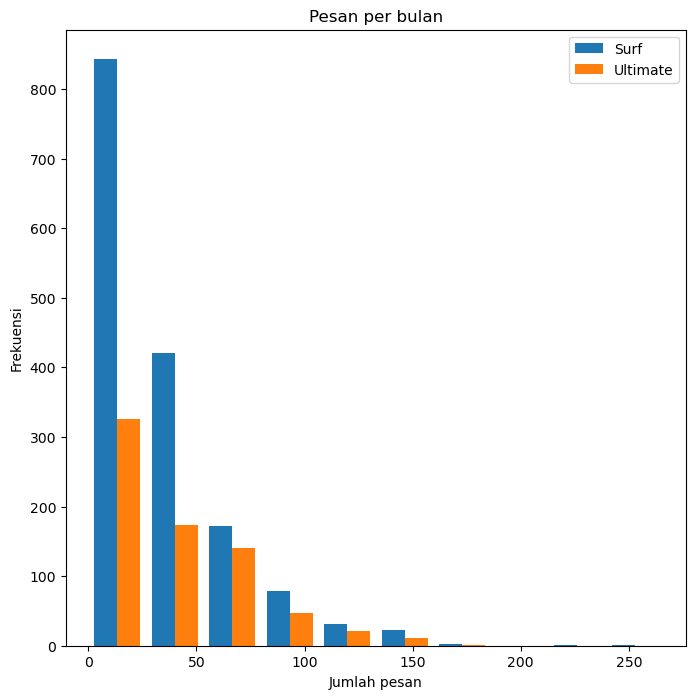

In [81]:
# Ukuran histogram
plt.figure(figsize=(8,8))

# Histogram
plt.hist(
         [surf_user['total_messages'],ultimate_user['total_messages']], 
         bins=10,
         label=['Surf','Ultimate']
)

# Judul histogram
plt.title("Pesan per bulan")

# Penamaan x,y-axis
plt.xlabel('Jumlah pesan')
plt.ylabel('Frekuensi')

# Legend pada histogram
plt.legend()

# Menampilkan histogram
plt.show()

Seperti yang terlihat banyak pengguna dengan paket surf melakukan sms sebanyak 0 sampai kurang lebih 50 sms perbulan dengan rata-rata 32 sms. Sedangkan pengguna dengan paket ultimate melakukan sms sebanyak 0 sampai kurang lebih 80 sms perbulan dengan rata-rata 38 sms.

[Kembali ke tahapan](#back)

#### Analisa volume data per bulan

In [82]:
# Varians kedua pengguna
print('varian pengguna surf:', np.var(surf_user['total_gb']))
print('varian pengguna ultimate:', np.var(ultimate_user['total_gb']))

varian pengguna surf: 61.544449424470294
varian pengguna ultimate: 58.748840663580154


In [83]:
# Rata-rata kedua pengguna
print('rata-rata pengguna surf:', surf_user['total_gb'].mean())
print('rata-rata pengguna ultimate:', ultimate_user['total_gb'].mean())

rata-rata pengguna surf: 16.670692943420217
rata-rata pengguna ultimate: 17.306944444444444


In [84]:
# Standard deviasi kedua pengguna
print('Standar deviasi pengguna surf:', surf_user['total_gb'].std())
print('Standar deviasi pengguna ultimate:', ultimate_user['total_gb'].std())

Standar deviasi pengguna surf: 7.8475218915011755
Standar deviasi pengguna ultimate: 7.670107545560864


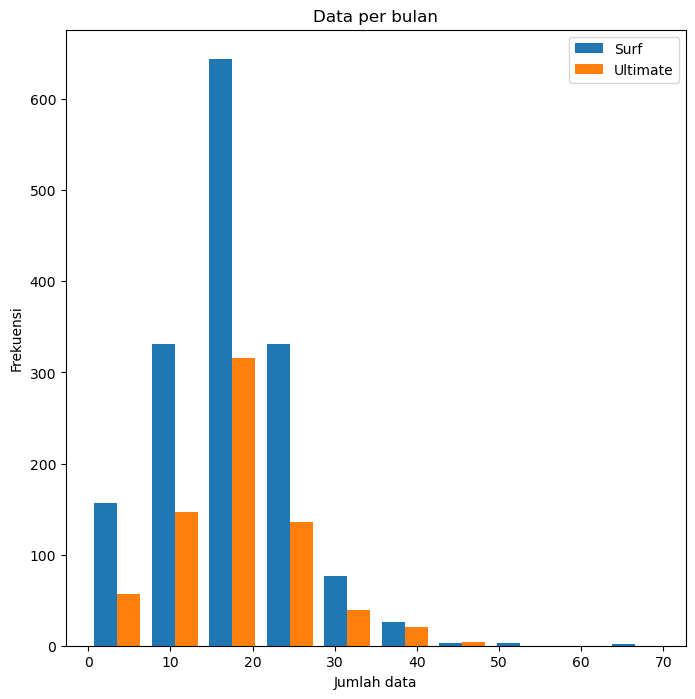

In [85]:
# Ukuran histogram
plt.figure(figsize=(8,8))

# Histogram
plt.hist(
         [surf_user['total_gb'],ultimate_user['total_gb']], 
         bins=10,
         label=['Surf','Ultimate']
)

# Judul histogram
plt.title("Data per bulan")

# Penamaan x,y-axis
plt.xlabel('Jumlah data')
plt.ylabel('Frekuensi')

# Legend pada histogram
plt.legend()

# Menampilkan histogram
plt.show()

Seperti yang terlihat banyak pengguna dengan paket surf menghabiskan data sebanyak 7 sampai 28 gb perbulan dengan rata-rata 17 gb. Sedangkan pengguna dengan paket ultimate menghabiskan data sebanyak 9 sampai 23 gb perbulan dengan rata-rata 18 gb.

[Kembali ke tahapan](#back)

## Menguji Hipotesis <a id="Test"></a>

Uji hipotesis kali ini akan menggunakan t-test dimana sampel untuk menguji perbedaan antara dua variabel.

ada beberapa jenis T-test, seperti *one sample t-test, independent sample t-test, dan paired sample t-test*, dan untuk saat ini yang akan digunakan adalah *Independent sample t-test* karena sample yang akan diuji memiliki perbedaan.

T-test sendiri memiliki nilai *p-value* atau probabilitas kemunculan nilai dan juga *alpha* atau batas error yang digunakan.

Jadi, jika p-value lebih kecil dari alpha, maka kita bisa menyimpulkan bahwa bukti cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1). Sedangkan, jika p-value lebih besar dari alpha, maka kita gagal menolak hipotesis nol (H0) dan belum bisa mengambil kesimpulan apapun tentang hipotesis alternatif (H1).

### Rata-rata pendapatan dari pengguna paket telepon 'Surf' dan 'Ultimate' <a id="h1"></a>

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0 : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama.
2. H1 : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

Jika H0 mendefinisikan rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf 'sama', maka H1 akan mendefinisikan kebalikan dari H0 yaitu rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf 'berbeda'.

In [86]:
# Varians pengguna paket 'surf'
np.var(surf_user['monthly_profit'])

3065.8848438690225

In [87]:
# Varians pengguna paket 'ultimate'
np.var(ultimate_user['monthly_profit'])

129.66814043209837

In [88]:
# Alpha ditentukan 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(ultimate_user['monthly_profit'], surf_user['monthly_profit'], equal_var=False)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol') 
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 3.1703905481135734e-15
Kita menolak hipotesis nol


Seperti yang dijelaskan diatas, karena nilai *p-value* lebih kecil dari *alpha* maka hipotesis nol ditolak, yang berarti rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda secara statistik.

#### Paket prabayar yang mendatangkan lebih banyak pendapatan

Setelah mengetahui bahwa adanya perbedaan pendapat antara kedua paket, jadi selanjutnya akan menentukan paket mana yang mendatangkan pendapatan yang lebih tinggi.

In [89]:
# Pengelompokan berdasarkan jenis paket
mean_plan = df_clean.groupby(['plan_name']).agg({
    'monthly_profit':'mean'
}).reset_index()

# Merubah nama kolom
mean_plan = mean_plan.rename(columns={
    'monthly_profit':'profit_mean'
})

# Melihat hasilnya
mean_plan

,plan_name,profit_mean
0,surf,60.706408
1,ultimate,72.313889


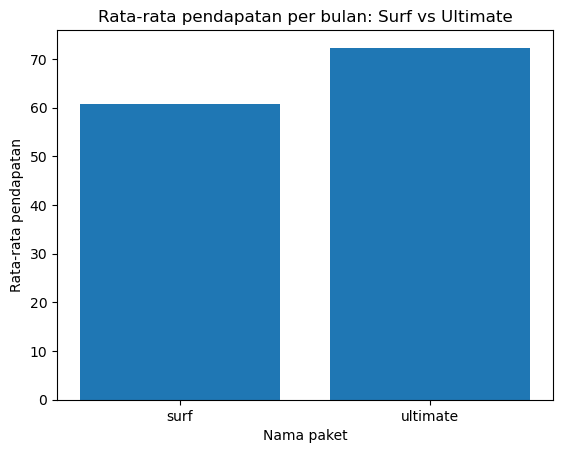

In [90]:
# Bar chart dari kedua paket
plt.bar(mean_plan.plan_name, mean_plan.profit_mean)

# Judul bar chart
plt.title('Rata-rata pendapatan per bulan: Surf vs Ultimate')

# Nama pada x,y-axis
plt.xlabel('Nama paket')
plt.ylabel('Rata-rata pendapatan')

# Menampilkan hasilnya
plt.show()

In [91]:
# Pengelompokan berdasarkan jenis paket
sum_plan = df_clean.groupby(['plan_name']).agg({
    'monthly_profit':'sum'
}).reset_index()

# Merubah nama kolom
sum_plan = sum_plan.rename(columns={
    'monthly_profit':'profit_total'
})

# Melihat hasilnya
sum_plan

,plan_name,profit_total
0,surf,95491.18
1,ultimate,52066.00


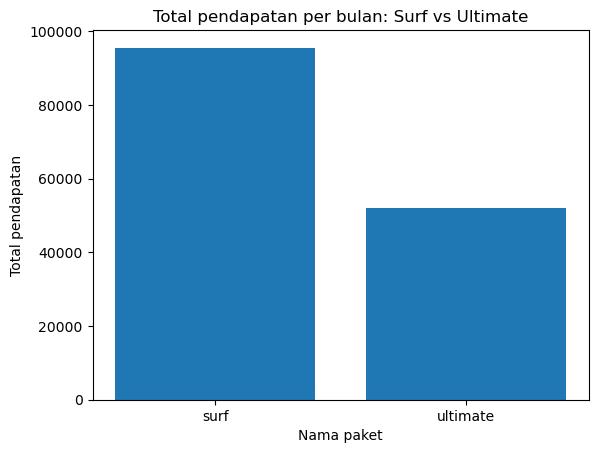

In [92]:
# Bar chart dari kedua paket
plt.bar(sum_plan.plan_name, sum_plan.profit_total)

# Judul bar chart
plt.title('Total pendapatan per bulan: Surf vs Ultimate')

# Nama pada x,y-axis
plt.xlabel('Nama paket')
plt.ylabel('Total pendapatan')

# Menampilkan hasilnya
plt.show()

*Findings*:
1. Rata-rata sekitar 72 USD dihabiskan pengguna yang menggunakan paket ultimate sedangkan rata-rata sekitar 61 USD untuk pengguna paket ultimate.
2. Total pendapatan sekitar 95491 USD didapatkan dari pengguna surf, sedangkan sebanyak 52066 USD dari pengguna ultimate

*Insights*:
1. Seperti yang dilihat, rata-rata pendapatan pengguna paket ultimate lebih tinggi dibandingkan pengguna paket surf.
2. Namun jika dilihat dari total pendapatan, pengguna dengan paket surf menghasilkan pendapatan yang lebih banyak dibandingkan pengguna ultimate.

[Kembali ke tahapan](#back)

### Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain <a id="h2"></a>

Sama halnya dengan uji hipotesis diatas, sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0 : Rata-rata pendapatan dari pengguna di wilayah NY-NJ sama dengan pendapatan pengguna dari wilayah lain.
2. H1 : Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Jika H0 mendefinisikan Rata-rata pendapatan dari pengguna di wilayah NY-NJ 'sama' dengan pendapatan pengguna dari wilayah lain, maka H1 akan mendefinisikan kebalikan dari H0 yaitu Rata-rata pendapatan dari pengguna di wilayah NY-NJ 'berbeda' dengan pendapatan pengguna dari wilayah lain.

In [93]:
# Memisahkan NY-NJ dengan yang lain
# NY-NJ
ny_nj = df_clean.loc[df_clean['is_ny_nj']==True]

In [94]:
# Tempat selain NY-NJ
other_places = df_clean.loc[df_clean['is_ny_nj']==False]

In [95]:
# Varians di wilayah NY-NJ
np.var(ny_nj['monthly_profit'])

1890.5177172681151

In [96]:
# Varians di wilayah lain
np.var(other_places['monthly_profit'])

2223.886695816218

In [97]:
# Alpha ditentukan 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(ny_nj['monthly_profit'], other_places['monthly_profit'], equal_var=False)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:

    print('Kita menolak hipotesis nol') 
else:

    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 0.033525615885300314
Kita menolak hipotesis nol


Seperti yang dijelaskan diatas, karena nilai *p-value* lebih kecil dari *alpha* maka hipotesis nol ditolak, yang berarti rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

In [98]:
# Pengelompokan berdasarkan jenis paket
ny_nj_mean = df_clean.groupby('is_ny_nj').agg({
    'monthly_profit':'mean'
}).reset_index()

# Merubah nama kolom
ny_nj_mean = ny_nj_mean.rename(columns={
    'monthly_profit':'profit_mean'
})

# Mengganti nilai true, false
ny_nj_mean['is_ny_nj'][1] = 'NY-NJ'
ny_nj_mean['is_ny_nj'][0] = 'Other'

# Melihat hasilnya
ny_nj_mean

,is_ny_nj,profit_mean
0,Other,65.222771
1,NY-NJ,59.921353


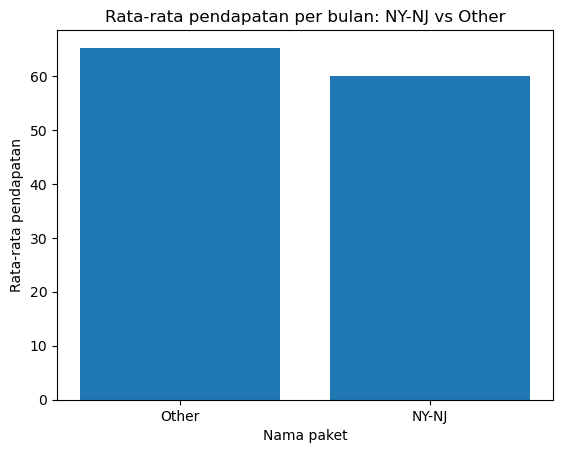

In [99]:
# Bar chart dari kedua paket
plt.bar(ny_nj_mean.is_ny_nj, ny_nj_mean.profit_mean)

# Judul bar chart
plt.title('Rata-rata pendapatan per bulan: NY-NJ vs Other')

# Nama pada x,y-axis
plt.xlabel('Nama paket')
plt.ylabel('Rata-rata pendapatan')

# Menampilkan hasilnya
plt.show()

*Findings*:
1. Rata-rata sekitar 60 USD dihabiskan pengguna di NY-NJ sedangkan rata-rata sekitar 65 USD untuk pengguna di tempat lain.

*Insights*:
1. Seperti yang dilihat, rata-rata pendapatan pengguna paket tempat lain lebih tinggi dibandingkan pengguna paket di NY-NJ.

[Kembali ke tahapan](#back)

## Kesimpulan Umum <a id="Kesimpulan"></a>

Setelah melakukan pemeriksaan data, melakukan beberapa perbaikan dan menambah kolom yang diperlukan dataset baru bisa dianalisa, berikut hasil analisa:
1. Pengguna dengan paket surf melakukan panggilan selama 200 sampai 690 menit perbulan dengan rata-rata 429 menit. Sedangkan pengguna dengan paket ultimate melakukan panggilan selama 230 sampai 680 menit perbulan dengan rata 431 menit.
2. Pengguna dengan paket surf melakukan sms sebanyak 0 sampai kurang lebih 50 sms perbulan dengan rata-rata 32 sms. Sedangkan pengguna dengan paket ultimate melakukan sms sebanyak 0 sampai kurang lebih 80 sms perbulan dengan rata-rata 38 sms.
3. Pengguna dengan paket surf menghabiskan data sebanyak 7 sampai 28 gb perbulan dengan rata-rata 17 gb. Sedangkan pengguna dengan paket ultimate menghabiskan data sebanyak 9 sampai 23 gb perbulan dengan rata-rata 18 gb.
4. Pendapatan dari pengguna surf berbeda dengan ultimate, dan dari perbedaan tersebut setelah dianalisa lebih lanjut pendapatan dari pengguna yang memakai paket surf menjadi pendapatan yang lebih tinggi dari pengguna dengan paket ultimate
5. Rata-rata pendapatan dari pengguna di wilayah NY-NJ terdapat perbedaan dengan wilayah lainnya, dimana hasilnya menunjukkan rata-rata pendapatan di tempat lain lebih tinggi daripada pengguna yang ada di wilayah NY-NJ.

[Kembali ke tahapan](#back)